<a href="https://colab.research.google.com/github/imelda18/Computer-Vision/blob/main/Tirana_CV_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision - Tirana May 2025
# Final Evaluation Exercise: Complete the following exercises

## 1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

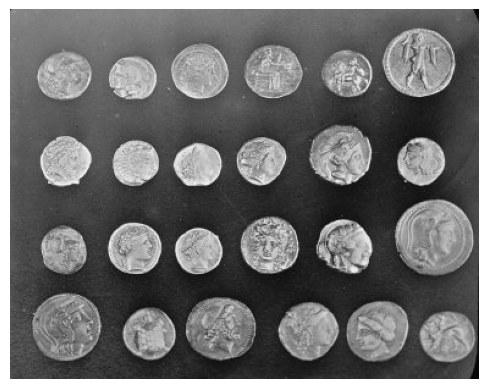

Image size: (303, 384)
Pixel value range: 1 - 252


In [2]:
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

# Load coins image
image = data.coins()

# Display image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Image size and pixel range
print(f"Image size: {image.shape}")
print(f"Pixel value range: {image.min()} - {image.max()}")


## 2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

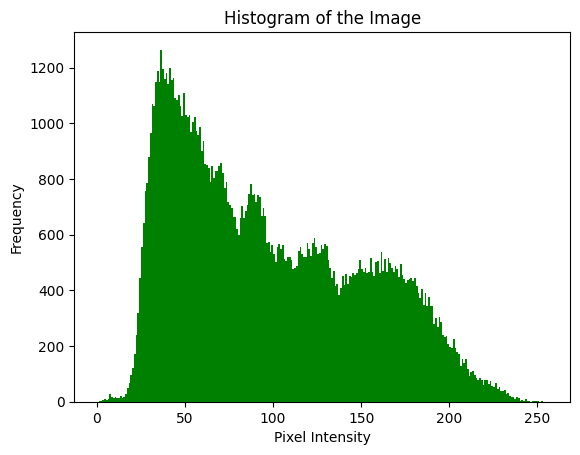

In [3]:
plt.hist(image.ravel(), bins=256, range=(0, 256), color='green')
plt.title('Histogram of the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


*Peaks at low intensities represent the background.Peaks in the mid-high range represent coin regions.*

## 3. Applied noise to the image and use the correct function to erase the noise.

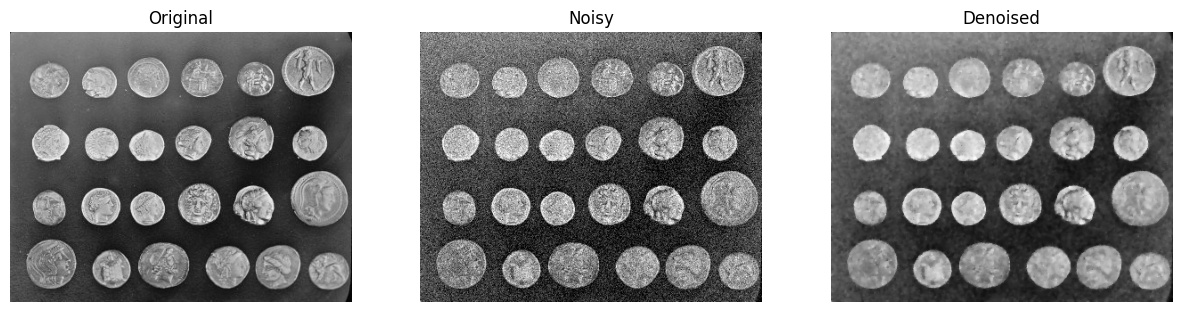

In [4]:
from skimage.util import random_noise
from skimage.restoration import denoise_tv_chambolle

# Add Gaussian noise
noisy_image = random_noise(image, mode='gaussian')

# Denoise using Total Variation filter
denoised_image = denoise_tv_chambolle(noisy_image, weight=0.1)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray'); axes[0].set_title("Original")
axes[1].imshow(noisy_image, cmap='gray'); axes[1].set_title("Noisy")
axes[2].imshow(denoised_image, cmap='gray'); axes[2].set_title("Denoised")
for ax in axes: ax.axis('off')
plt.show()


## 4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

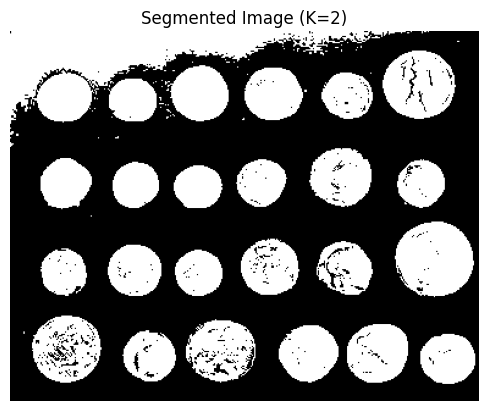

In [5]:
from sklearn.cluster import KMeans

# Reshape and apply K-means
X = image.reshape(-1, 1)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
seg = kmeans.labels_.reshape(image.shape)

plt.imshow(seg, cmap='gray')
plt.title('Segmented Image (K=2)')
plt.axis('off')
plt.show()


## 5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

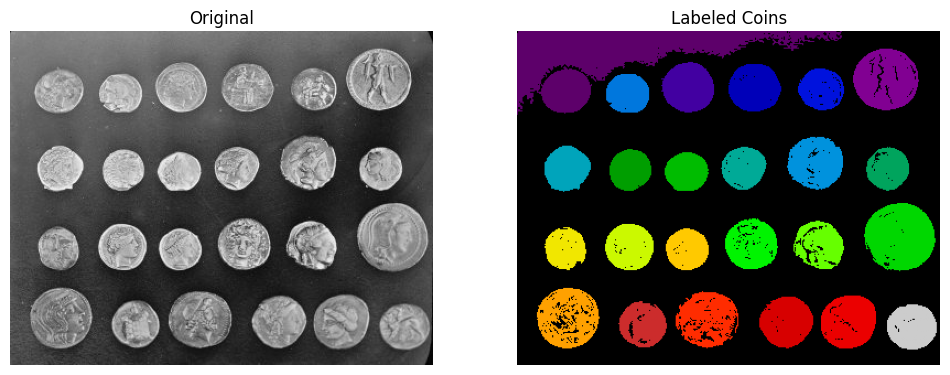

Number of coins detected: 24


In [6]:
from skimage.measure import label
from skimage import morphology

# Use a binary mask for labeling
binary = seg == seg[0, 0]
binary = morphology.remove_small_objects(~binary, 50)

# Label image
labeled = label(binary)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray'); axes[0].set_title("Original")
axes[1].imshow(labeled, cmap='nipy_spectral'); axes[1].set_title("Labeled Coins")
for ax in axes: ax.axis('off')
plt.show()

print(f"Number of coins detected: {labeled.max()}")


## 6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.  

Average area: 1866.62
Average major axis length: 56.95
Average orientation (radians): -0.00


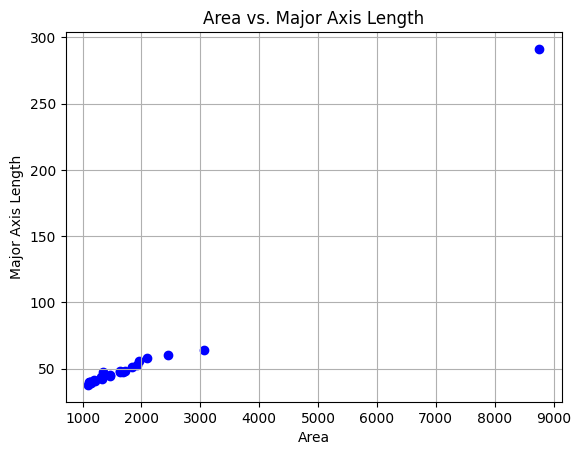

In [7]:
from skimage.measure import regionprops
import pandas as pd

regions = regionprops(labeled)

areas = [r.area for r in regions]
major_axis = [r.major_axis_length for r in regions]
orientations = [r.orientation for r in regions]

# Averages
print(f"Average area: {np.mean(areas):.2f}")
print(f"Average major axis length: {np.mean(major_axis):.2f}")
print(f"Average orientation (radians): {np.mean(orientations):.2f}")

# Scatterplot
plt.scatter(areas, major_axis, c='blue')
plt.xlabel("Area")
plt.ylabel("Major Axis Length")
plt.title("Area vs. Major Axis Length")
plt.grid(True)
plt.show()


## 7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

In [8]:
large_coins = [r for r in regions if r.area > 1750]
print(f"Number of coins with area > 1750 pixels: {len(large_coins)}")


Number of coins with area > 1750 pixels: 7


##8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

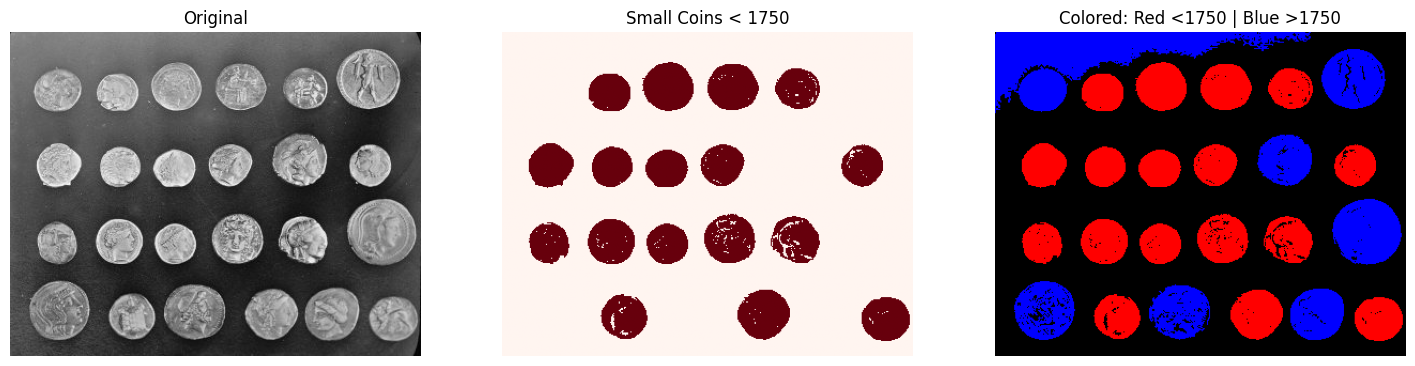

In [9]:
from skimage.color import label2rgb

mask_small = np.zeros_like(labeled, dtype=bool)
mask_large = np.zeros_like(labeled, dtype=bool)

for r in regions:
    if r.area > 1750:
        mask_large[labeled == r.label] = True
    else:
        mask_small[labeled == r.label] = True

colored = np.zeros((*labeled.shape, 3))
colored[mask_small] = [1, 0, 0]  # red
colored[mask_large] = [0, 0, 1]  # blue

# Display
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(image, cmap='gray'); axes[0].set_title("Original")
axes[1].imshow(mask_small, cmap='Reds'); axes[1].set_title("Small Coins < 1750")
axes[2].imshow(colored); axes[2].set_title("Colored: Red <1750 | Blue >1750")
for ax in axes: ax.axis('off')
plt.show()


## 9. Describe the main steps required to perform  segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

Steps:

1. Load the image and convert it to a suitable feature space.

2. Preprocess the data if necessary.

3. Choose an unsupervised clustering algorithm other than K-Means, such as: Gaussian Mixture Models (GMM),Agglomerative Clustering (Hierarchical clustering),DBSCAN (Density-based spatial clustering)

4. Apply the clustering algorithm to group pixels based on their feature similarity.

5. Reshape the cluster labels back to the original image shape to get the segmented image.

6. Visualize and analyze the segmentation results.





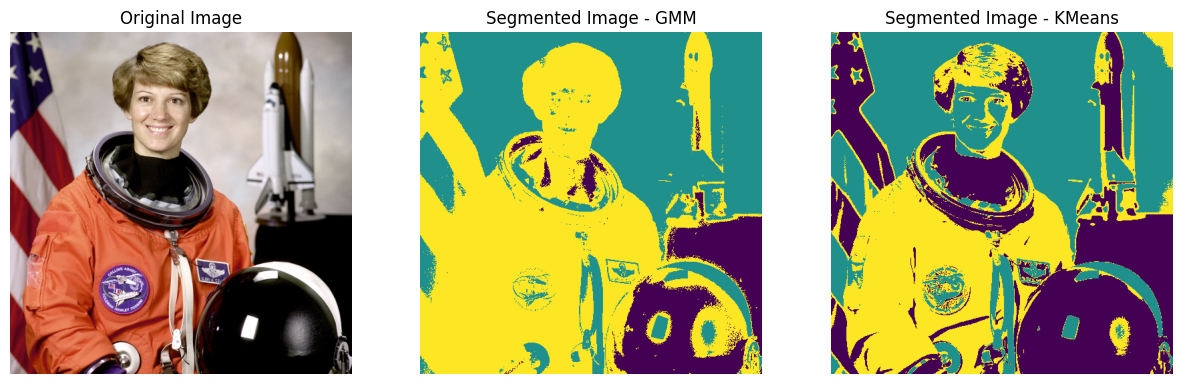

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

# Load built-in RGB image
image = data.astronaut()

# Reshape image to pixels × 3 color channels
pixels = image.reshape(-1, 3)

# Apply Gaussian Mixture Model with 3 clusters
gmm = GaussianMixture(n_components=3, random_state=0).fit(pixels)
gmm_labels = gmm.predict(pixels)
segmented_gmm = gmm_labels.reshape(image.shape[:2])

# For comparison: K-Means segmentation
kmeans = KMeans(n_clusters=3, random_state=0).fit(pixels)
kmeans_labels = kmeans.labels_
segmented_kmeans = kmeans_labels.reshape(image.shape[:2])

# Plot results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(segmented_gmm, cmap='viridis')
axs[1].set_title('Segmented Image - GMM')
axs[2].imshow(segmented_kmeans, cmap='viridis')
axs[2].set_title('Segmented Image - KMeans')
for ax in axs:
    ax.axis('off')
plt.show()


GMM segmentation shows smoother and more natural transitions between regions, capturing gradual color variations better. K-Means results in more uniform, distinct clusters but can create sharper and sometimes less realistic boundaries.


## 10. Extract the main texture features of this image

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_ubyte
from skimage.feature.texture import graycomatrix, graycoprops

# Load the 'coins' image
img = data.coins()
img = img_as_ubyte(img)

# Compute Gray-Level Co-occurrence Matrix (GLCM)
glcm = graycomatrix(img,
                    distances=[1],
                    angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
                    levels=256,
                    symmetric=True,
                    normed=True)

# Extract texture features from GLCM
contrast = graycoprops(glcm, 'contrast').mean()
dissimilarity = graycoprops(glcm, 'dissimilarity').mean()
homogeneity = graycoprops(glcm, 'homogeneity').mean()
energy = graycoprops(glcm, 'energy').mean()
correlation = graycoprops(glcm, 'correlation').mean()

# Display results
print("Texture Features of 'coins' image (averaged over 4 directions):")
print(f"Contrast:       {contrast:.4f}")
print(f"Dissimilarity:  {dissimilarity:.4f}")
print(f"Homogeneity:    {homogeneity:.4f}")
print(f"Energy:         {energy:.4f}")
print(f"Correlation:    {correlation:.4f}")

Texture Features of 'coins' image (averaged over 4 directions):
Contrast:       435.0948
Dissimilarity:  10.4830
Homogeneity:    0.2040
Energy:         0.0179
Correlation:    0.9224


## Personal discussion

The Computer Vision course greatly improved my understanding of image processing techniques and how to analyze visual data effectively. The professor was very positive, encouraging, and supportive throughout the course, which made learning enjoyable and motivating. Overall, it was a valuable experience that deepened my knowledge in the field.
